In [1]:
import numpy as np
import matplotlib.pyplot as plt

from twoTIC import get_rgba_three

In [2]:
xx = np.linspace(0, np.pi, 200)
yy = np.linspace(-2, 2, 200)
peaks = np.cos(xx)
intensity = np.exp(-(yy.reshape(200, 1)-peaks.reshape(1, 200))**2)
p1 = np.array([1,0,0])
p2 = np.array([0.5, 0.5, 0.5])
p3 = np.array([0, 1.0, 0.])
p4 = np.array([0, 0., 1.])
temp = np.vstack(
[np.linspace(p1, p2, 60), np.linspace(p2, p3, 60), np.linspace(p3, p4, 80)]
)
character = np.array([temp]*200)

In [3]:
character.shape

(200, 200, 3)

Text(0.5, 1.0, 'Character')

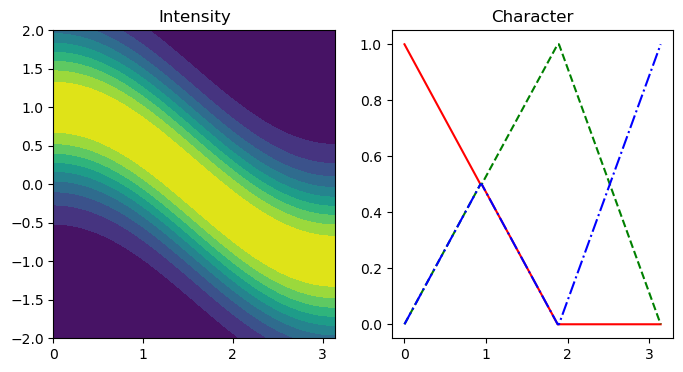

In [4]:
fig, axes = plt.subplots(1,2, figsize=(8, 4))

ax = axes[0]
ax.contourf(xx, yy, intensity, 10)
ax.set_title("Intensity")

ax = axes[1]
ax.plot(xx, character[0,:,0], c='r')
ax.plot(xx, character[0,:,1], 'g--')
ax.plot(xx, character[0,:,2], 'b-.')
ax.set_title("Character")

If Character only has meaning when Intensity is high, then we can reasonably display both pieces of information in one 2D color plot. We let lightness represent the itensity and hue represent the character. This is implemented by the method get_rgba() using matplotlib's colormap gist_heat as the basis.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


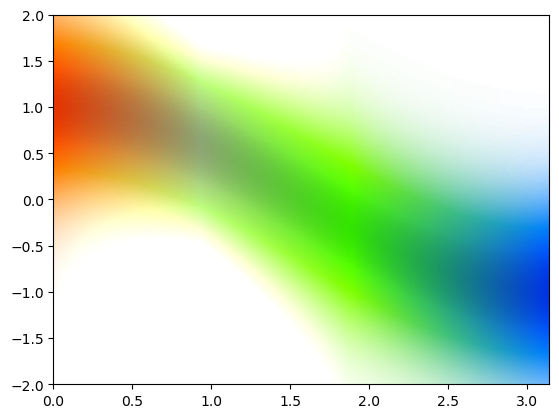

In [7]:
red, green, blue, rgba = get_rgba_three(intensity, character, 2.5*np.max(intensity))
extent = (0, np.pi, -2, 2)

fig, ax = plt.subplots()
ax.imshow(rgba[::-1,::], extent=extent, aspect='auto')